# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

**Atributos da base de dados - Lista de clientes de cartão de crédito**

• # CUSTID: Identificação do cliente

• # BALANCE: Saldo para fazer compras

• # BALANCE_FREQUENCY: Frequência que o saldo é atualizado (1 = frequente, 0
= não frequente)

• # PURCHASES: Quantidade de compras realizadas

• # ONEOFFPURCHASES: Quantidade de compras feitas “de uma só vez” (sem
parcelar)

• # INSTALLMENTS_PURCHASES: Quantidade de compras parceladas

• # CASH_ADVANCE: Dinheiro adiantado

• # PURCHASES_FREQUENCY: Frequência das compras (entre 1 e 0)

• # ONEOFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e
0)

• # PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas
(entre 1 e 0)

• # CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado

• # CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance"

• # PURCHASES_TRX: Número de compras

• # CREDIT_LIMIT: Limite do cartão de crédito

• # PAYMENTS: Valor pago

• # MINIMUM_PAYMENTS: Valor mínimo pago

• # PRC_FULL_PAYMENT: Percentual de pagamentos da fatura “completa”

• # TENURE: Posse do titular do cartão

In [6]:
creditcard_df.shape

(8950, 18)

In [7]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
creditcard_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [10]:
# Cliente que fez a maior compra à vista

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [12]:
# Cliente com maior saque do limite do cartão de crédito

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Nesta análise preliminar, dos dois exemplos de clientes anteriores, podemos notar 2 possíveis grupos dado os seus comportamentos de uso do cartão, onde o primeiro utiliza mais o cartão para compras enquanto que o segundo utiliza mais para efetuar saques do limite.

## Visualização e exploração dos dados

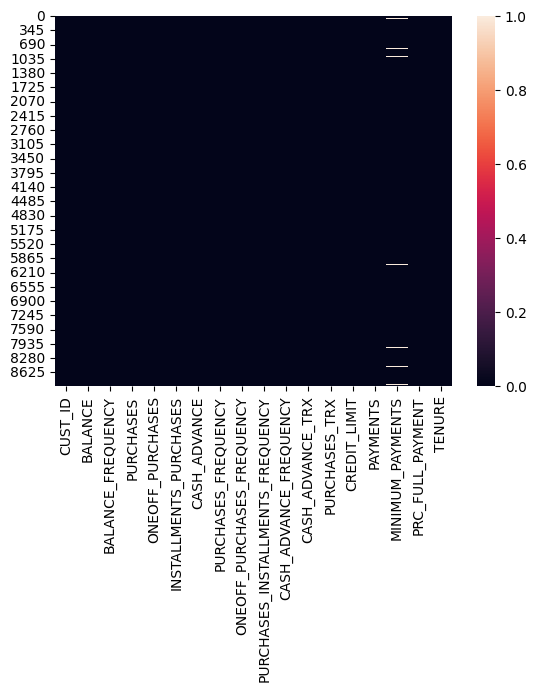

In [13]:
# Visualizando a existência de valores nulos - barrinhas brancas no mapa de calor

sns.heatmap(creditcard_df.isnull());

In [14]:
# Visualizando a soma de valores nulos por atributo

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
# Decidi preencher os valores nulos de pagamentos mínimos com sua média
# Obtendo a média

mean_minimum_payments = creditcard_df['MINIMUM_PAYMENTS'].mean()
mean_minimum_payments

864.2065423050828

In [16]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(mean_minimum_payments, inplace=True)

In [17]:
# Outra forma de preencher valores nulos
# creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [18]:
# Decidi preencher os valores nulos de de limite de crédio com sua média

mean_credit_limit = creditcard_df['CREDIT_LIMIT'].mean()
mean_credit_limit

4494.449450364621

In [19]:
creditcard_df['CREDIT_LIMIT'].fillna(mean_credit_limit, inplace=True)

In [20]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

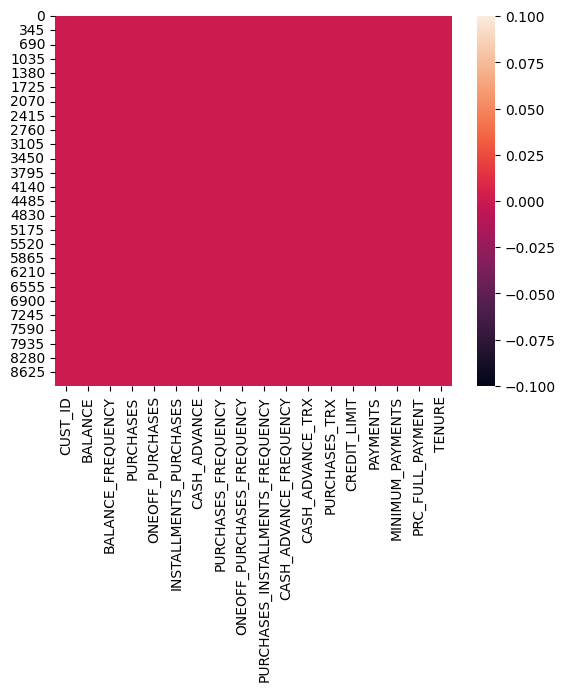

In [21]:
sns.heatmap(creditcard_df.isnull());

In [22]:
# Verificando existência de clientes repetidos

creditcard_df.duplicated().sum()

0

In [23]:
# Excluindo atributo de id dos clientes
# Não é relevante para o algoritmo de agrupamento que vou utilizar

creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [24]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
# Lista de colunas do dataframe

creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [26]:
# Quantidade de colunas do dataframe

len(creditcard_df.columns)

17

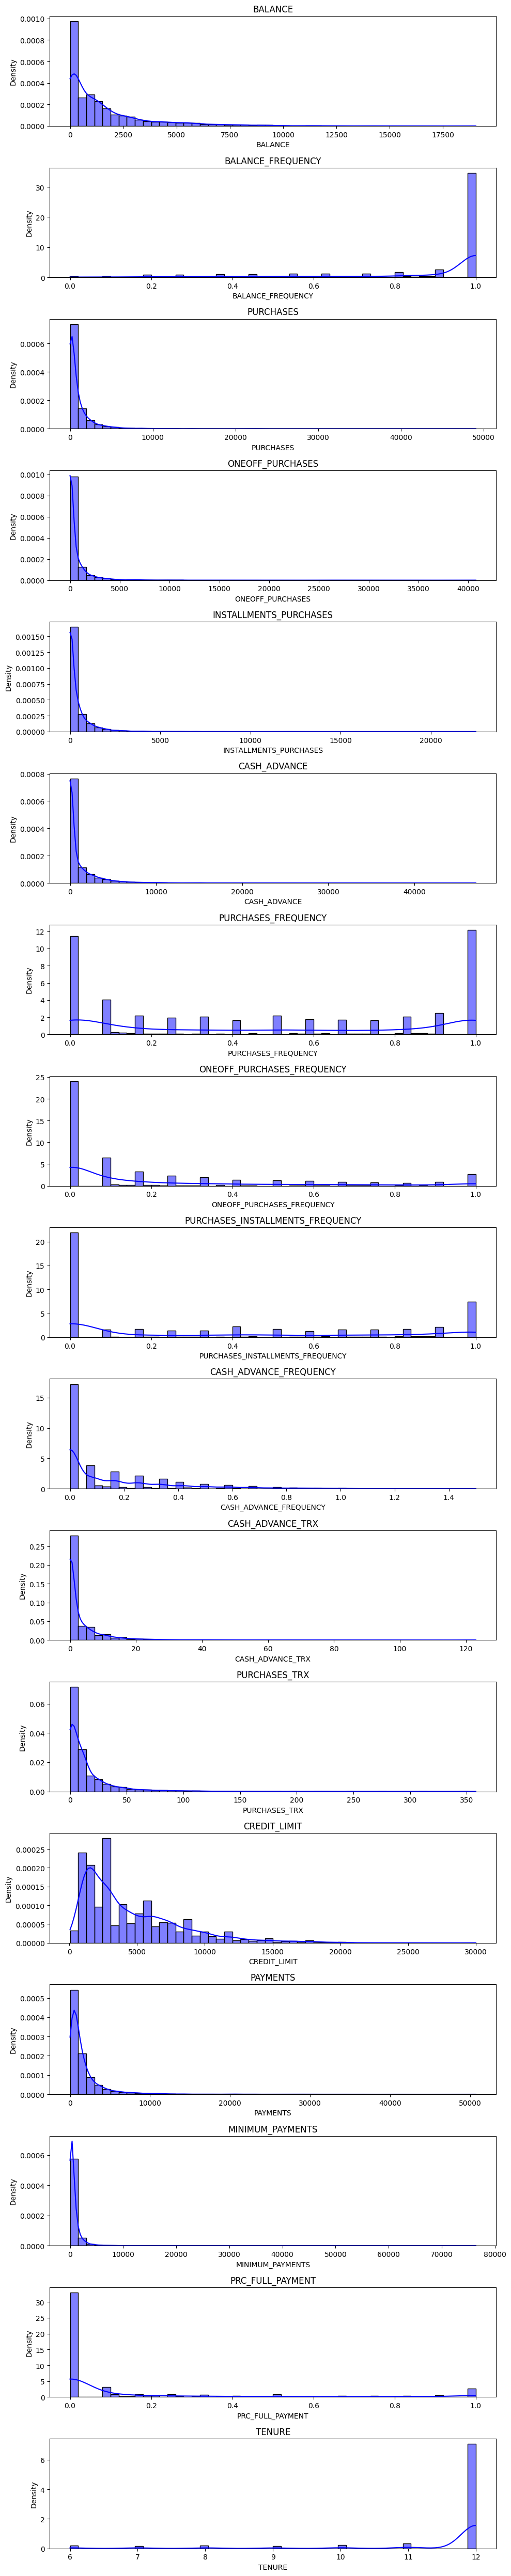

In [27]:
# Gerando gráficos de distribuição por atributo


plt.figure(figsize=(10, 50))
for i, column in enumerate(creditcard_df.columns):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[column], bins=50, kde=True, stat='density', color='blue')
    plt.title(column)

plt.tight_layout()
plt.show();

In [28]:
correlations = creditcard_df.corr()

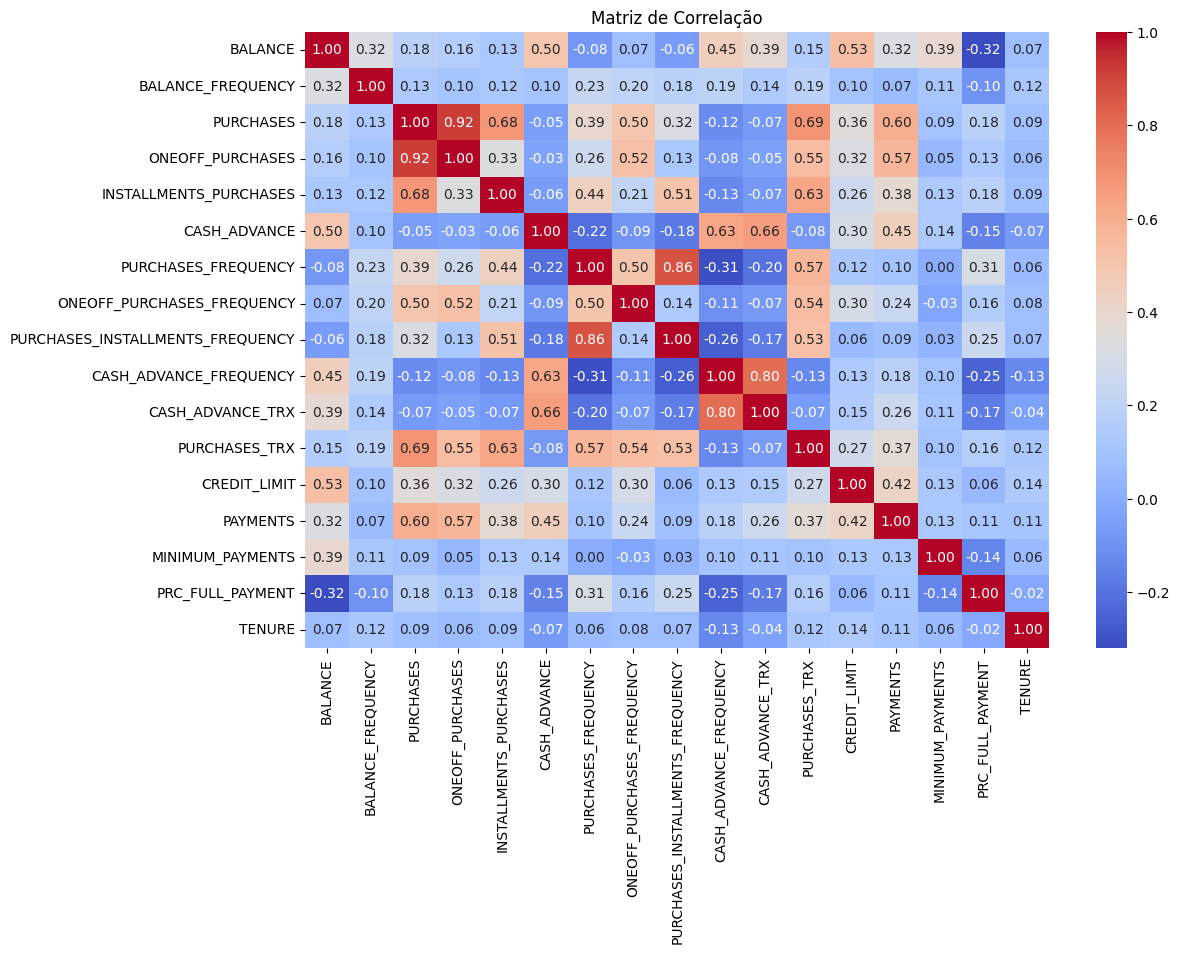

In [29]:
# Analisando força de correlação entre os atributos

plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## Definição do número de clusters usando o Elbow Method

- Mais detalhes
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [30]:
# Verificando mínimos e máximos do atributo saldo

min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [31]:
# Normalizando por padronização as escalas dos atributos
# Muito importante para algoritmos que calculam distâncias

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

**StandardScaler (Padronização):**

Transforma os dados de forma que a média seja 0 e o desvio padrão seja 1.
Adequado quando os dados seguem uma distribuição normal ou aproximadamente normal.
É menos sensível a outliers, pois não depende dos valores mínimos e máximos dos dados.
Pode resultar em valores negativos e positivos.
A escala dos dados é controlada pelas unidades de desvio padrão.

In [32]:
# Ao utilizar o scaler o tipo da base de dados muda

type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [33]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [34]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [35]:
# Testando quantidades de grupos - Elbow Method
# Para analisar os resultados
# E decidir a qtde ideal

wcss_1 = []
range_values = range(1, 20)
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [36]:
print(wcss_1)

[152149.99999999983, 127784.97295116563, 111986.96725649005, 99073.93826774803, 91502.98259428913, 84850.35005204253, 79576.92551374732, 74495.15240171355, 69954.25607014471, 66466.47220823725, 63636.759210231525, 61372.55108568344, 59142.01581472061, 57505.75508335537, 55823.5280830425, 54735.14358012929, 53043.68708275746, 51746.26407127651, 50360.690965570466]


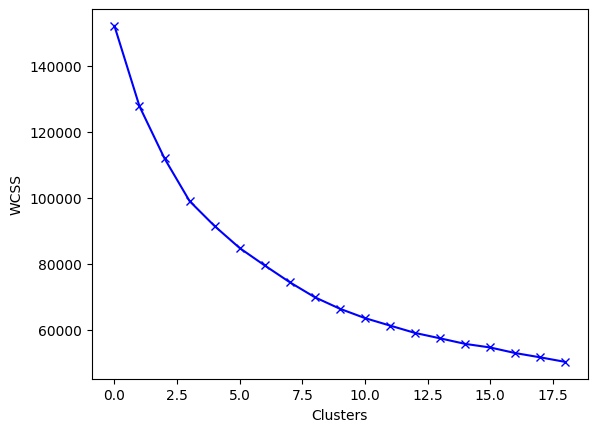

In [37]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

No gráfico acima podemos notar que a análise da quantidade ideal de clusters deve ficar entre 7 e 9, pois é justamente o ponto onde a diferença do WSS diminui de forma menos significante.

## Agrupamento com k-means

In [38]:
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [39]:
labels, len(labels)

(array([3, 2, 7, ..., 5, 5, 5], dtype=int32), 8950)

In [40]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([  55, 1186,  901, 2818,   74,  629, 2033, 1254]))

In [41]:
# Médias dos atributos em cada cluster

kmeans.cluster_centers_

array([[ 1.13559764e+00,  4.69241749e-01, -7.48064798e-02,
        -2.96768767e-01,  3.67637458e-01, -4.24150482e-02,
        -7.13659010e-02, -5.59998058e-01,  1.67463863e-01,
        -1.52909742e-01, -4.71192233e-02,  7.89698386e-02,
        -9.59196430e-02, -7.69948734e-02,  9.43658125e+00,
        -5.20370683e-01,  2.92748527e-01],
       [-7.01894429e-01, -2.13549368e+00, -3.07094734e-01,
        -2.30581240e-01, -3.02387130e-01, -3.22956991e-01,
        -5.47410007e-01, -4.28869929e-01, -4.41051313e-01,
        -5.22120165e-01, -3.76731809e-01, -4.16657368e-01,
        -1.72120795e-01, -2.01647962e-01, -2.57505533e-01,
         2.95702018e-01,  2.01906544e-01],
       [ 1.62738943e+00,  3.93035667e-01, -2.06541135e-01,
        -1.48658134e-01, -2.15333713e-01,  1.98946825e+00,
        -4.59434295e-01, -1.85681524e-01, -4.08917679e-01,
         1.92547315e+00,  1.92428934e+00, -2.40341196e-01,
         9.96415407e-01,  8.28212409e-01,  3.67551326e-01,
        -3.89097231e-01,  7.0

In [42]:
# Avaliando o modelo com o Silhouette Score:
# O escore de silhueta mede quão bem os pontos estão separados entre clusters.
# Varia de -1 a 1, onde valores mais altos indicam clusters mais densos e bem separados.

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(creditcard_df_scaled, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.2185524558994579


In [44]:
# Criação de dataframe para os valores médios dos clusters (valores padronizados)

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers.transpose()

,0,1,2,3,4,5,6,7
BALANCE,1.135598,-0.701894,1.627389,-0.001070,1.488505,-0.335506,-0.379188,0.142946
BALANCE_FREQUENCY,0.469242,-2.135494,0.393036,0.401525,0.403475,-0.348076,0.329829,0.430580
PURCHASES,-0.074806,-0.307095,-0.206541,-0.340950,7.413638,-0.284525,-0.038710,0.975813
ONEOFF_PURCHASES,-0.296769,-0.230581,-0.148658,-0.221306,6.553369,-0.208973,-0.230485,0.927002
INSTALLMENTS_PURCHASES,0.367637,-0.302387,-0.215334,-0.399482,5.486972,-0.288475,0.331743,0.604215
CASH_ADVANCE,-0.042415,-0.322957,1.989468,-0.113428,0.028557,0.065539,-0.366379,-0.307411
PURCHASES_FREQUENCY,-0.071366,-0.547410,-0.459434,-0.804514,1.072872,-0.198735,0.981674,1.100893
ONEOFF_PURCHASES_FREQUENCY,-0.559998,-0.428870,-0.185682,-0.329043,1.875094,-0.272572,-0.343547,1.886070
PURCHASES_INSTALLMENTS_FREQUENCY,0.167464,-0.441051,-0.408918,-0.752153,1.028264,-0.230755,1.170628,0.548005
CASH_ADVANCE_FREQUENCY,-0.152910,-0.522120,1.925473,0.071629,-0.309559,0.304112,-0.475283,-0.406772


In [45]:
# Inversão da padronização para obter um dataframe com os valores originais
# Sem padronização
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns], dtype=float)
cluster_centers.transpose()

,0,1,2,3,4,5,6,7
BALANCE,3928.125451,103.540821,4951.748564,1562.248677,4662.671853,866.148306,775.227321,1862.004038
BALANCE_FREQUENCY,0.988430,0.371392,0.970377,0.972388,0.972850,0.794815,0.955404,0.979271
PURCHASES,843.379636,347.092201,561.926515,274.760763,16842.556892,395.311749,920.499337,3088.044242
ONEOFF_PURCHASES,99.862000,209.719739,345.695316,225.115547,11469.688108,245.585564,209.879469,2131.070678
INSTALLMENTS_PURCHASES,743.517636,137.622715,216.344040,49.820955,5372.868784,150.203132,711.058826,957.452033
CASH_ADVANCE,889.924775,301.615215,5150.878965,741.006841,1038.757441,1116.308792,210.557265,334.216445
PURCHASES_FREQUENCY,0.461708,0.270648,0.305957,0.167460,0.920946,0.410589,0.884344,0.932192
ONEOFF_PURCHASES_FREQUENCY,0.035399,0.074517,0.147065,0.104298,0.761835,0.121144,0.099971,0.765109
PURCHASES_INSTALLMENTS_FREQUENCY,0.430992,0.189152,0.201923,0.065513,0.773096,0.272729,0.829675,0.582228
CASH_ADVANCE_FREQUENCY,0.104545,0.030663,0.520451,0.149478,0.073198,0.196000,0.040035,0.053745


**Análise preliminar dos Clusters**

- **Grupo 1**: Clientes que, em média, pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (103) e não sacam muito dinheiro do limite do cartão (301). 24% de pagamento da fatura completa do cartão de crédito

- **Grupo 2**: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (4951.74) e sacam muito dinheiro do cartão de crédito (5150.87), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03)

- **Grupo 4** (VIP/Prime): limite do cartão alto (12714.86) e alto percentual de pagamento da fatura completa (0.39).
Possível estratégia: Aumentar o limite do cartão e o hábito de compras

- **Grupo 5** (clientes novos): clientes mais novos (7.24) e que mantém pouco dinheiro na conta corrente (866)

In [46]:
labels, len(labels)

(array([3, 2, 7, ..., 5, 5, 5], dtype=int32), 8950)

In [47]:
# Concatenando coluna cluster no DataFrame de clientes

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


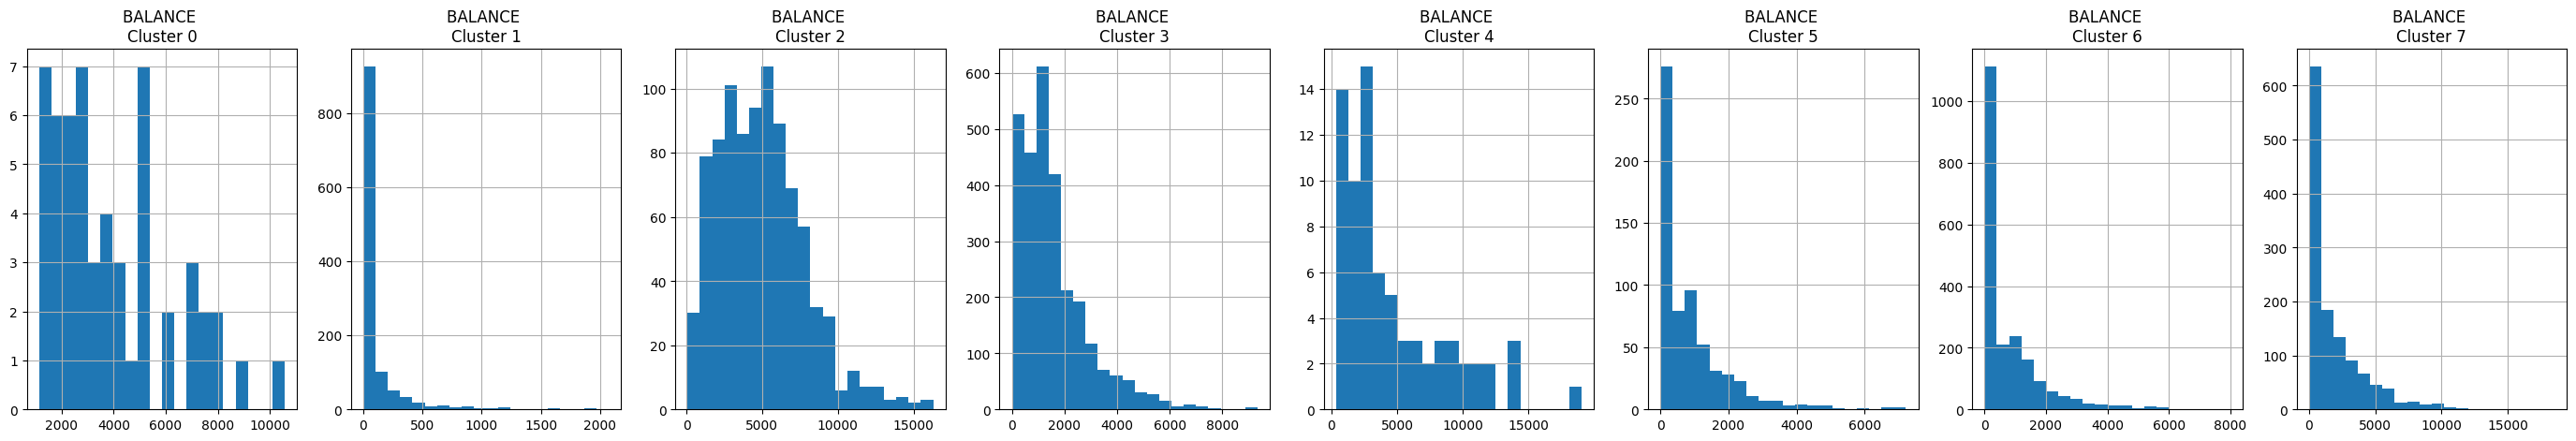

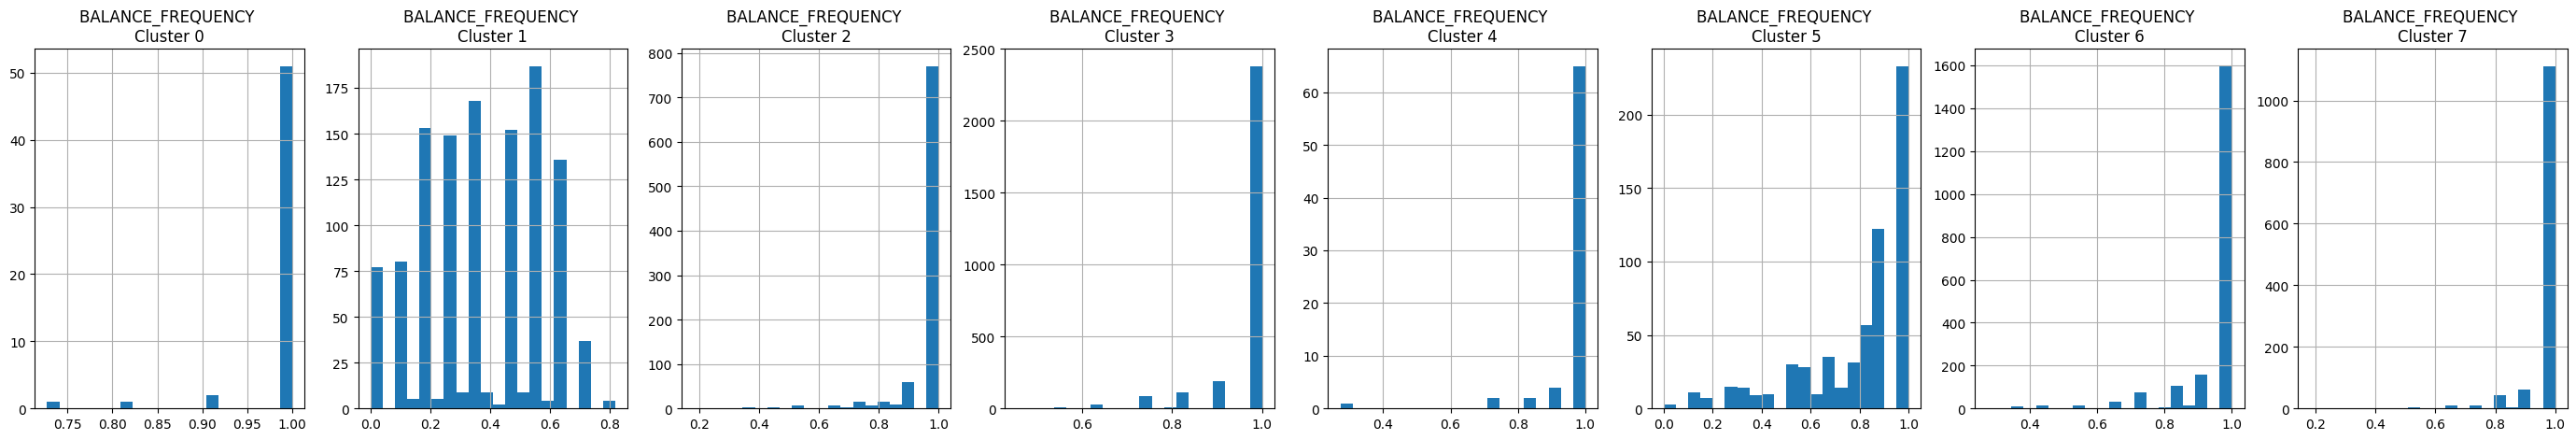

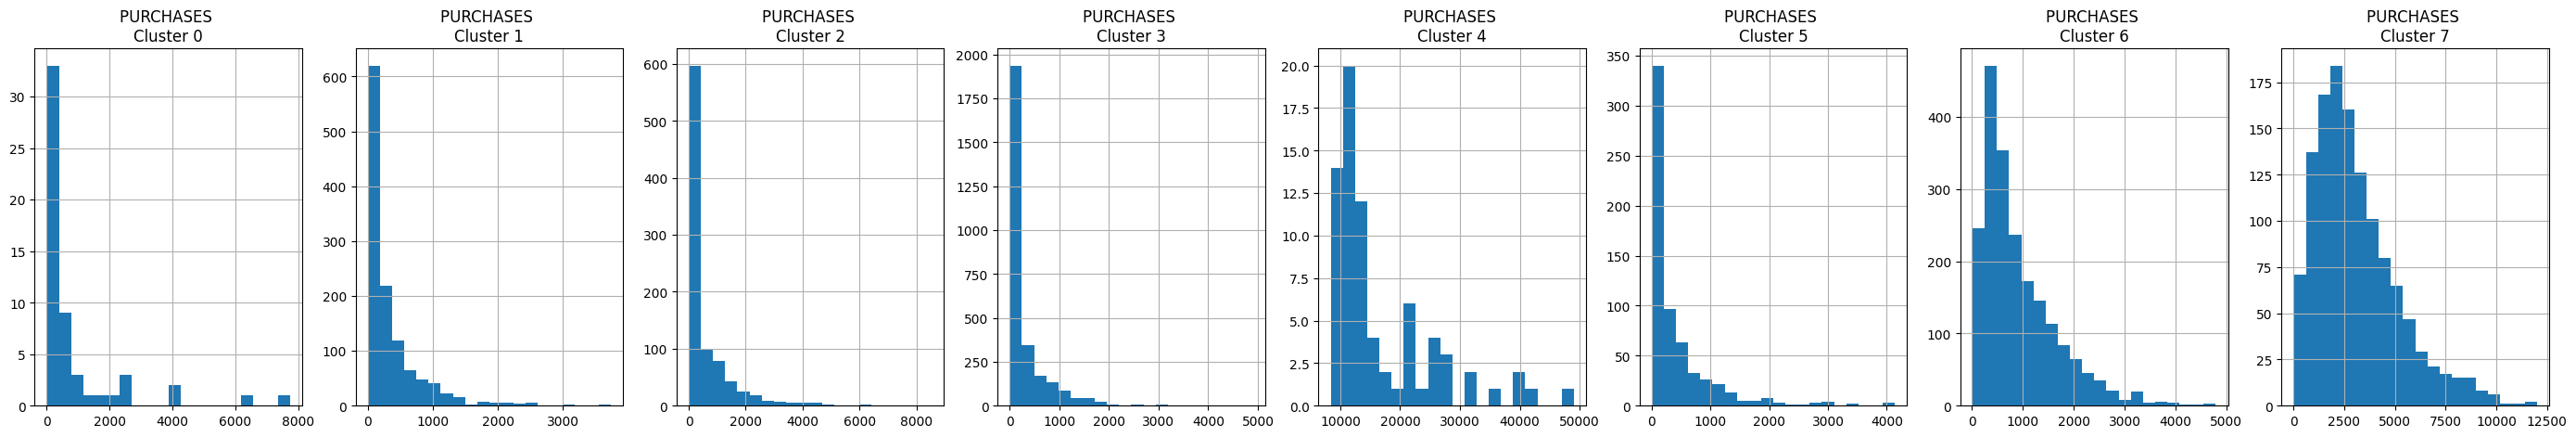

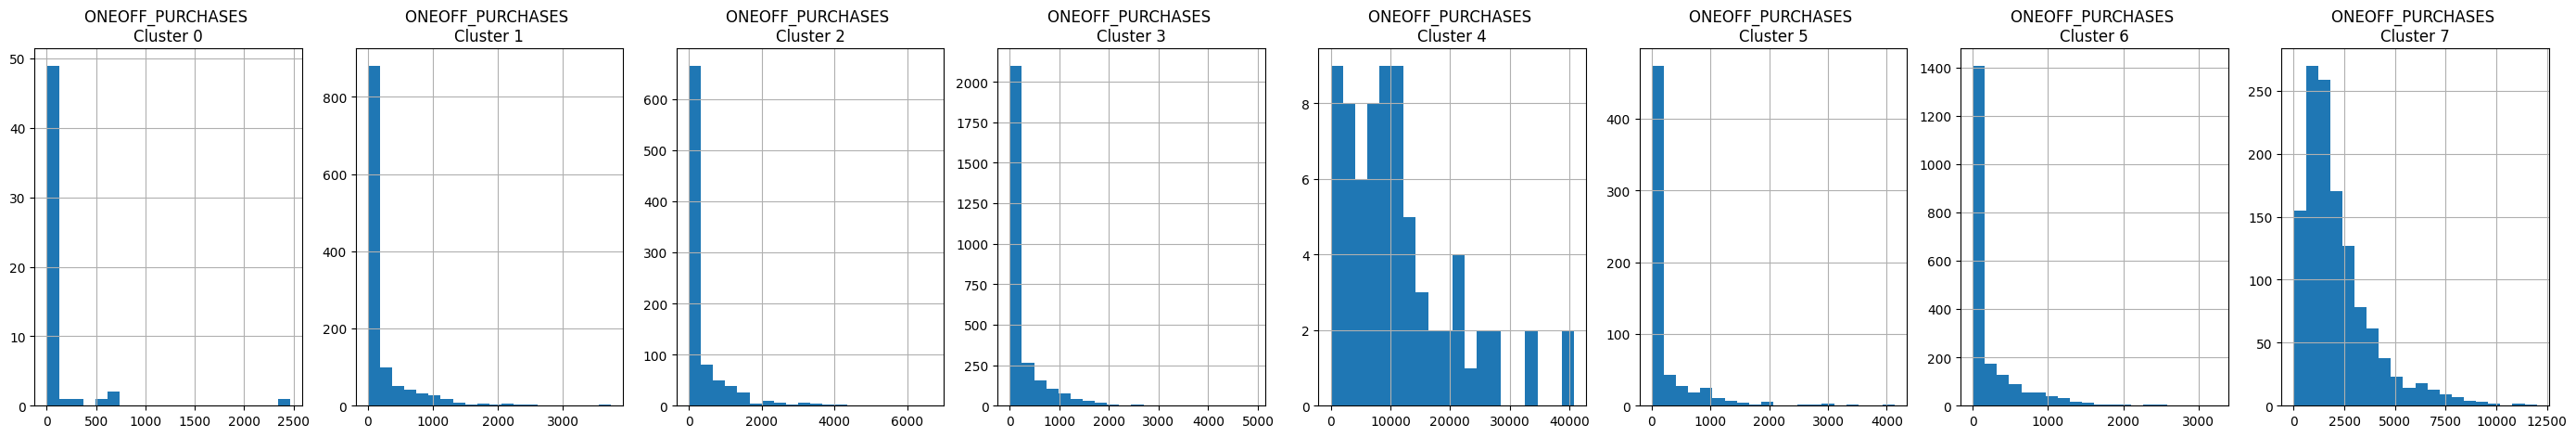

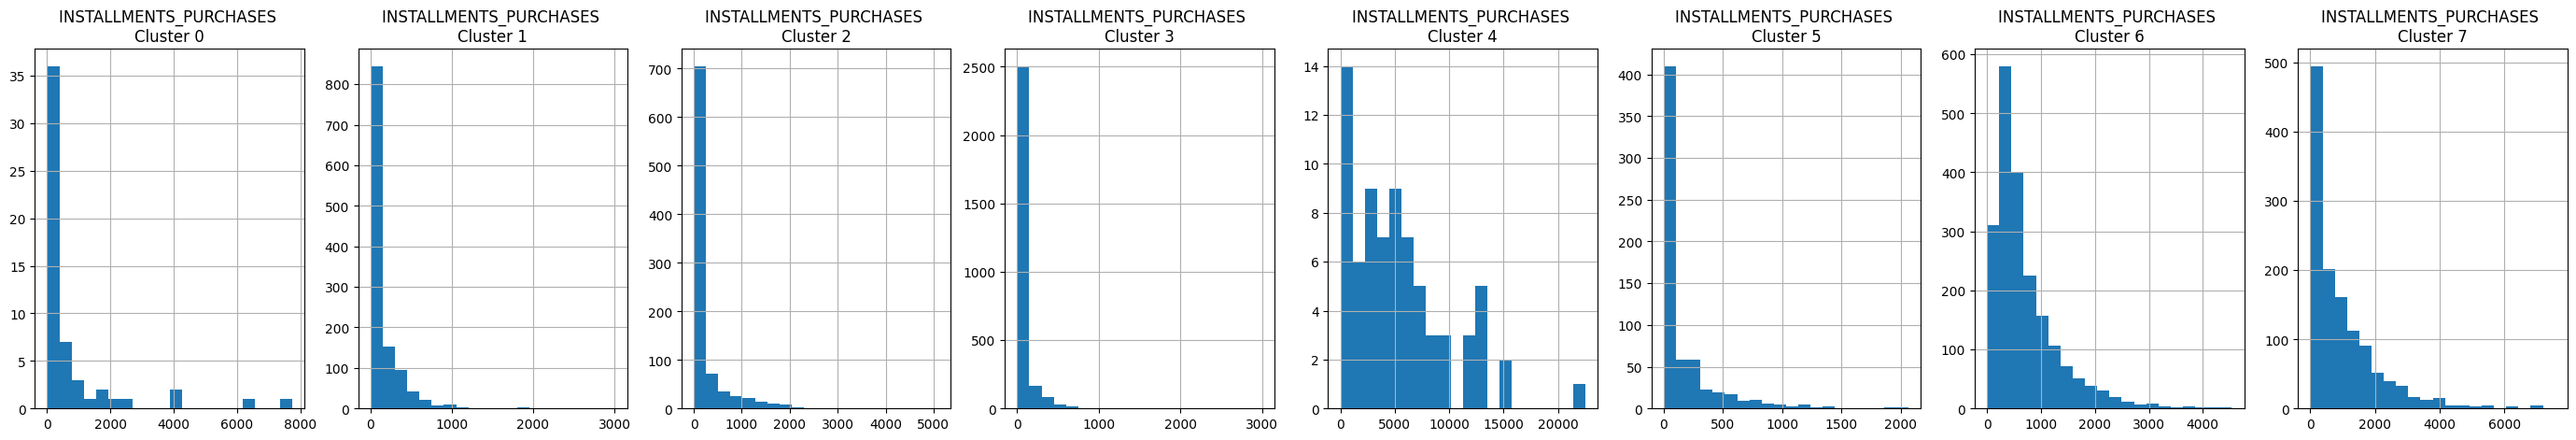

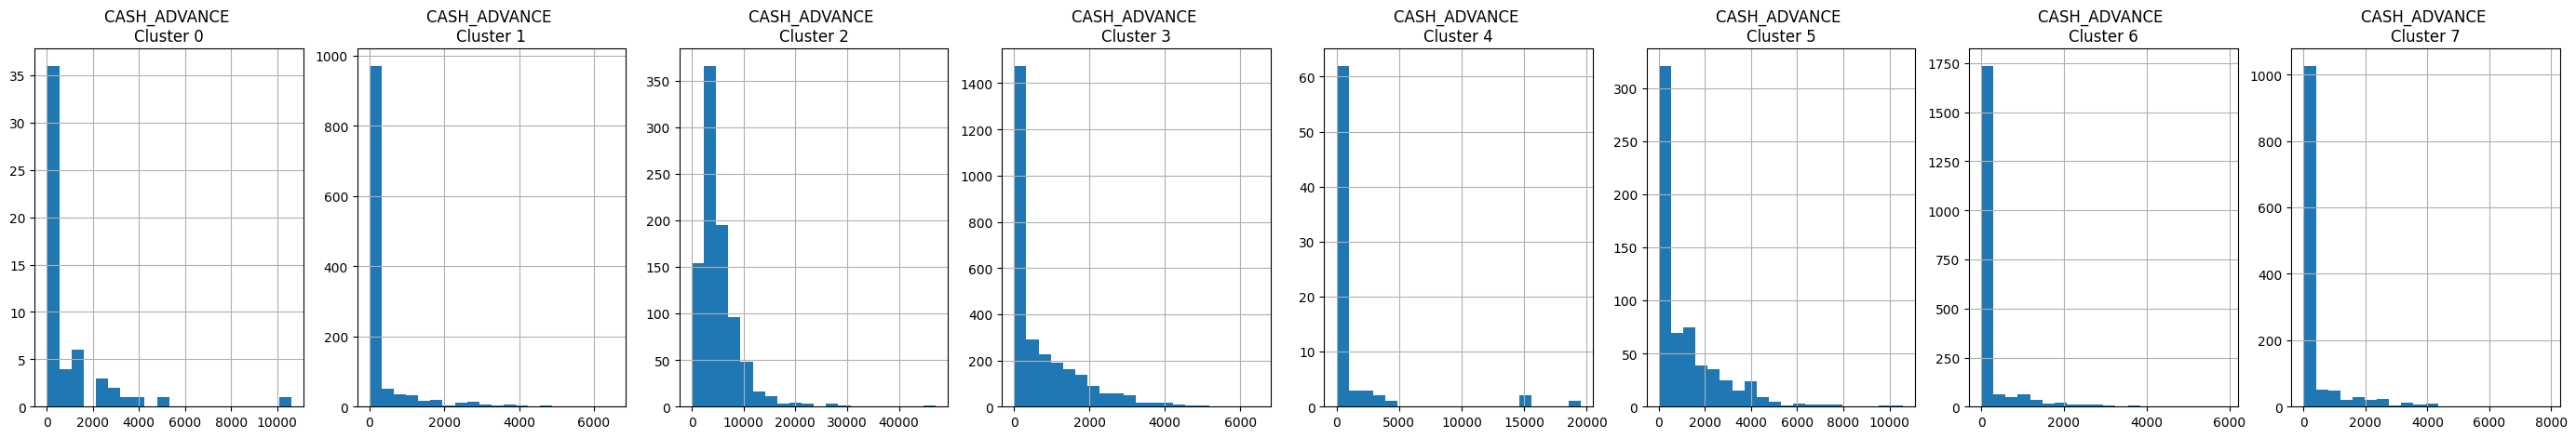

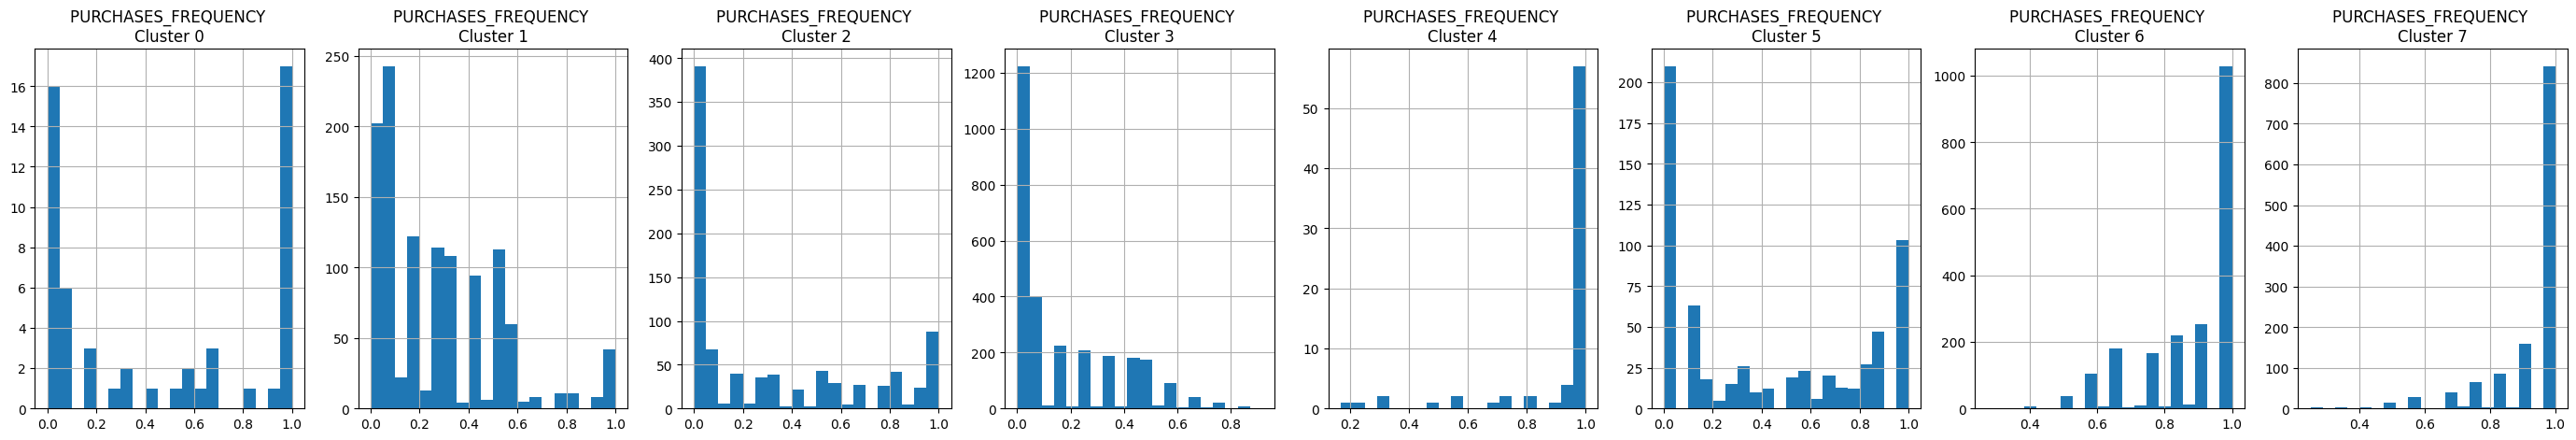

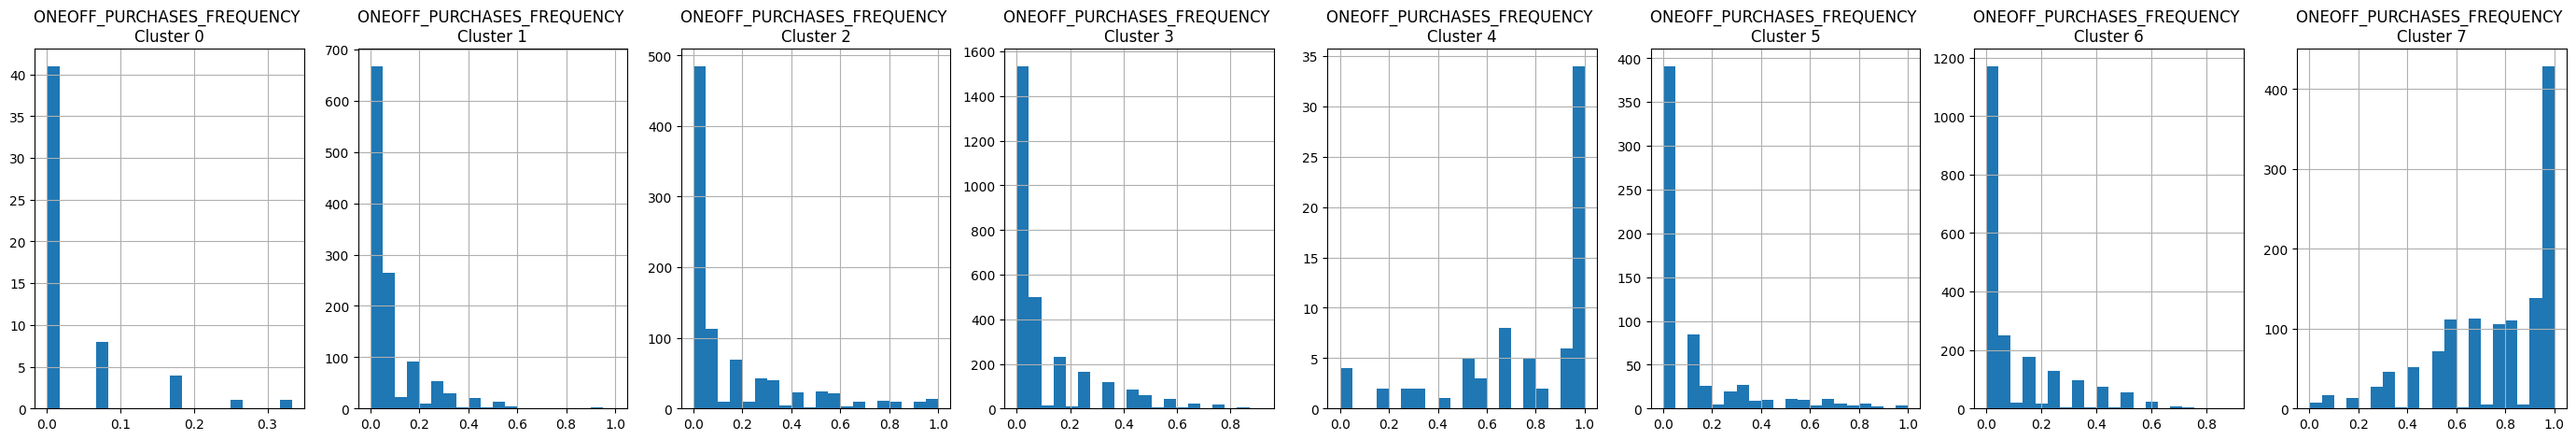

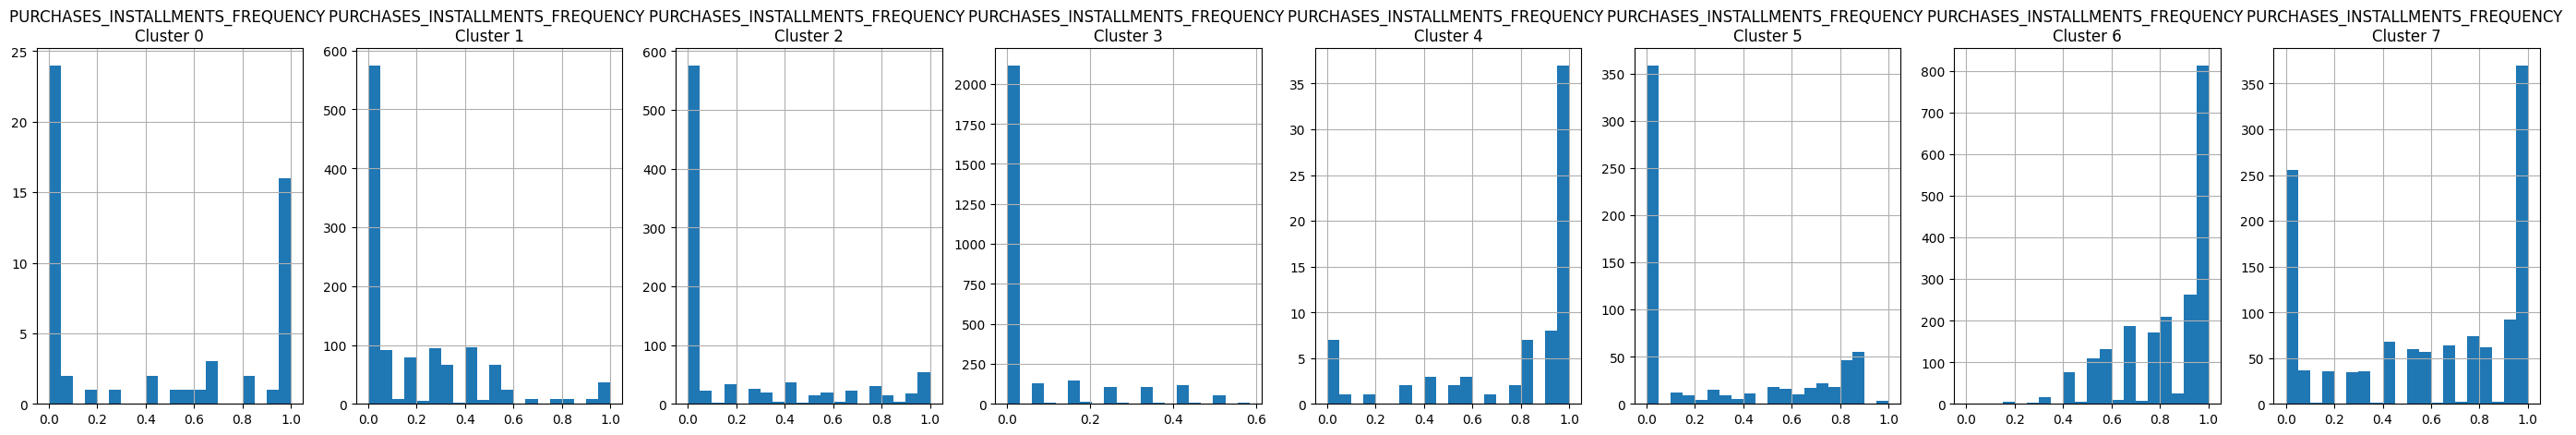

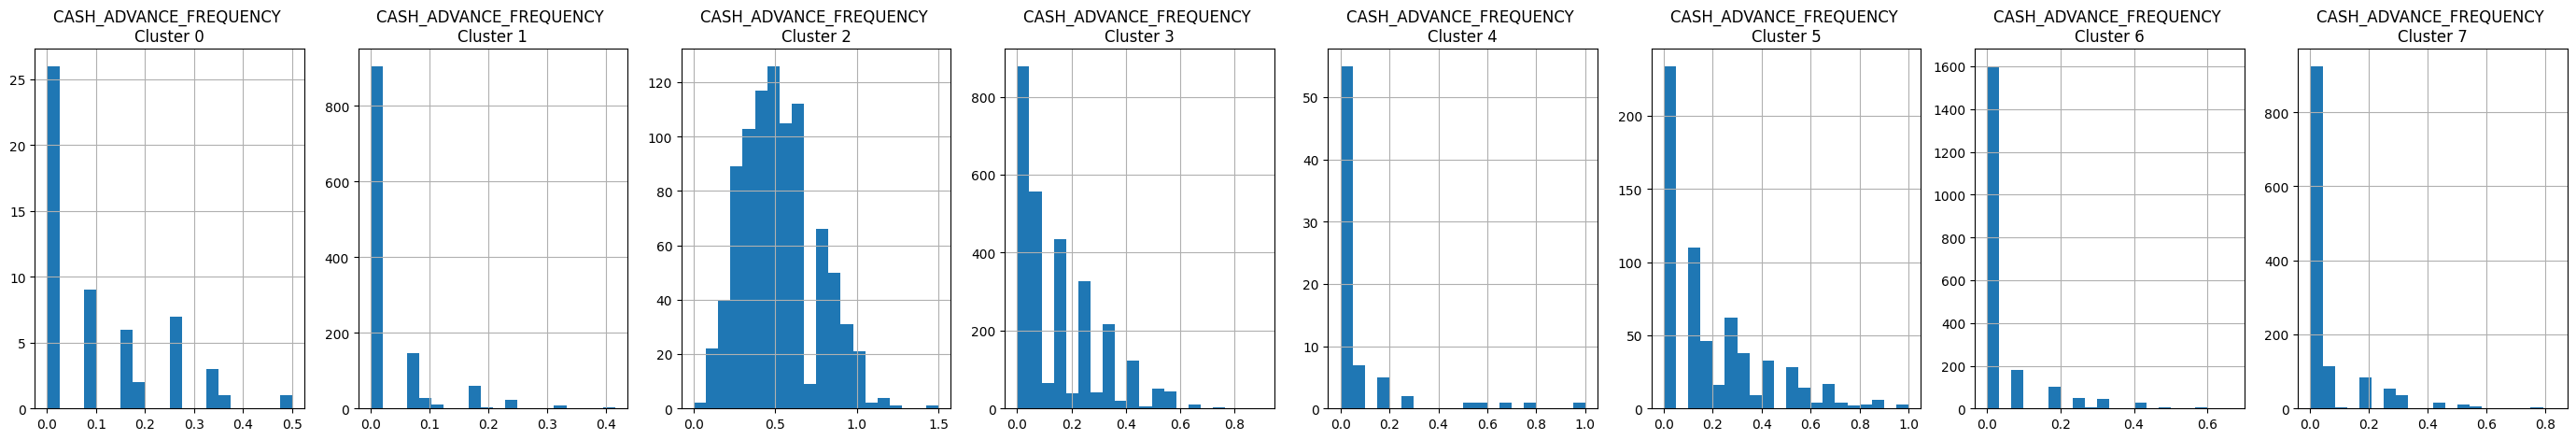

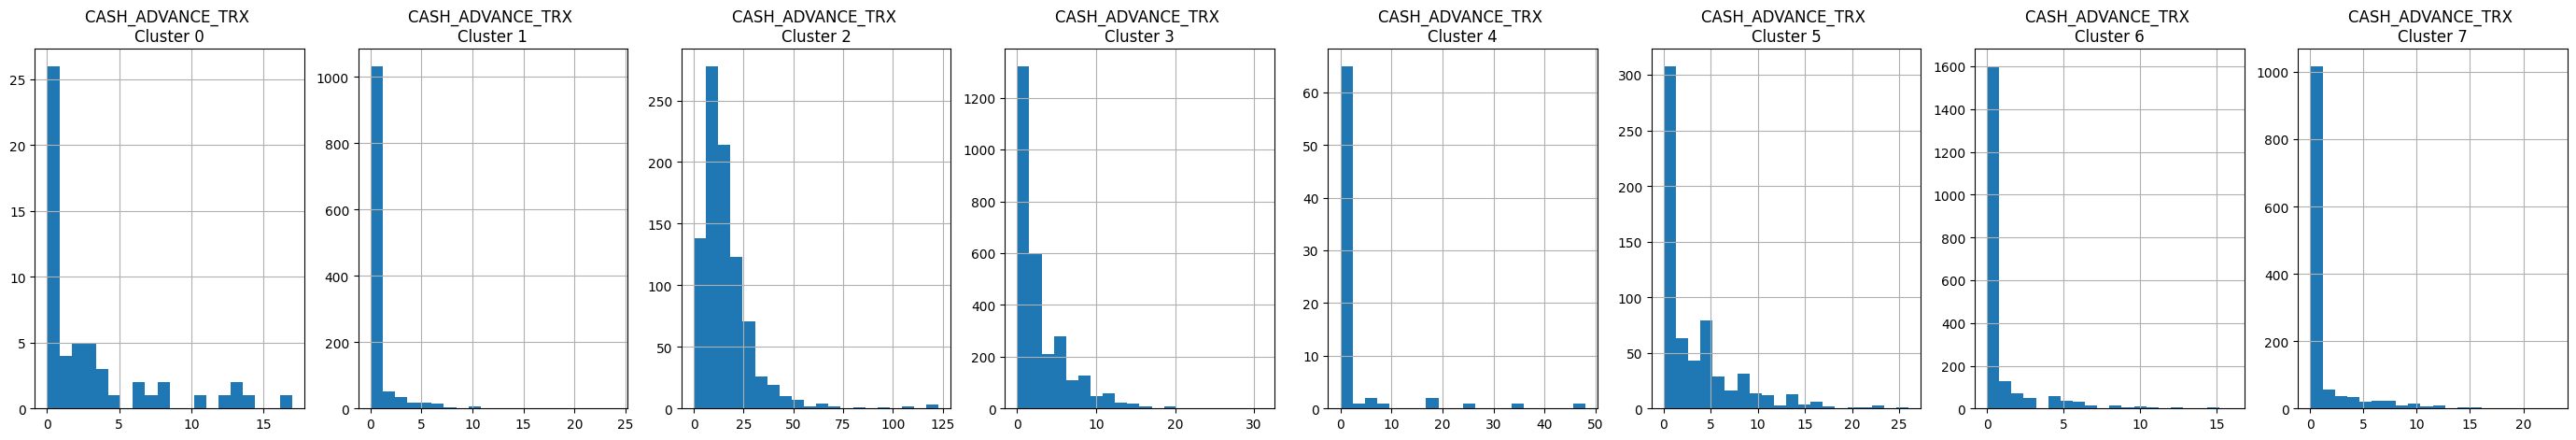

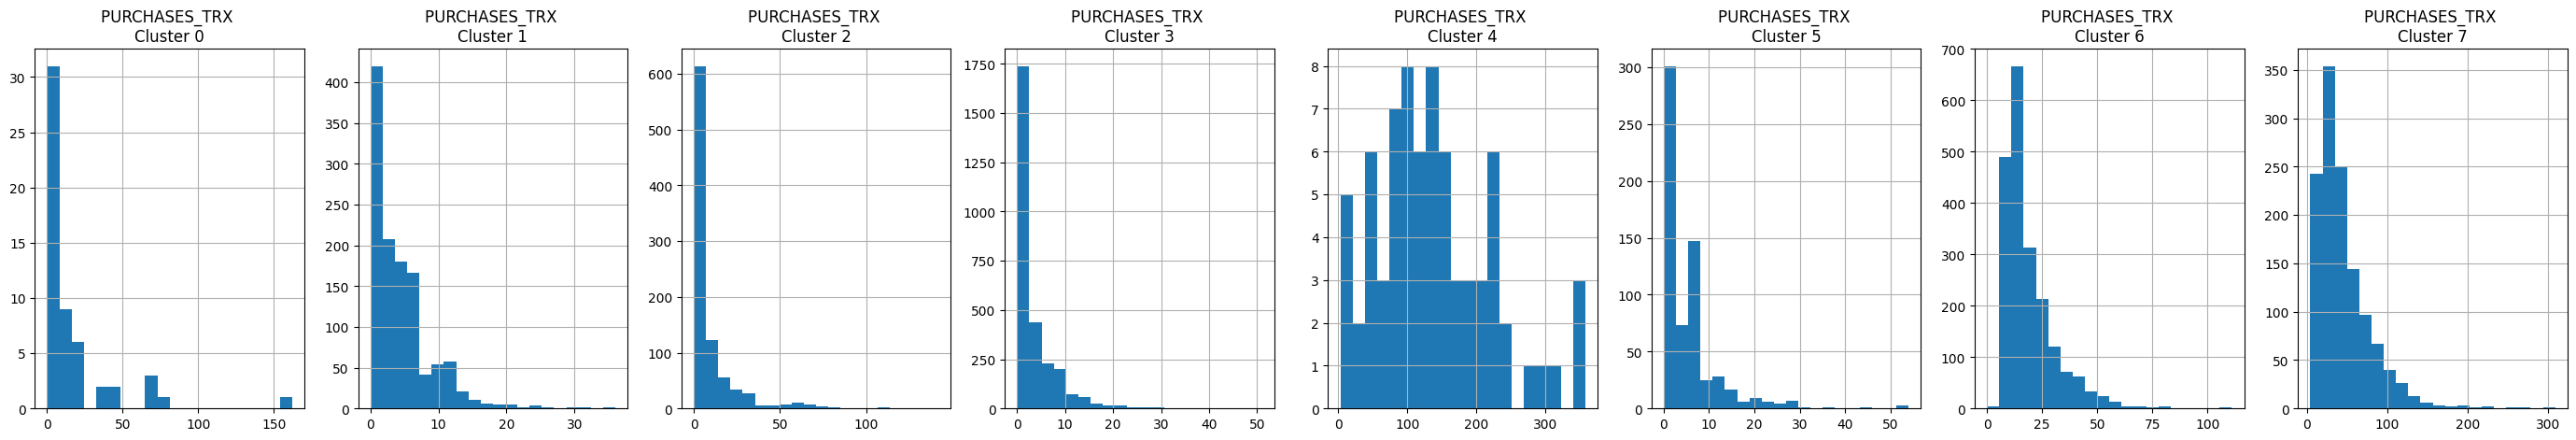

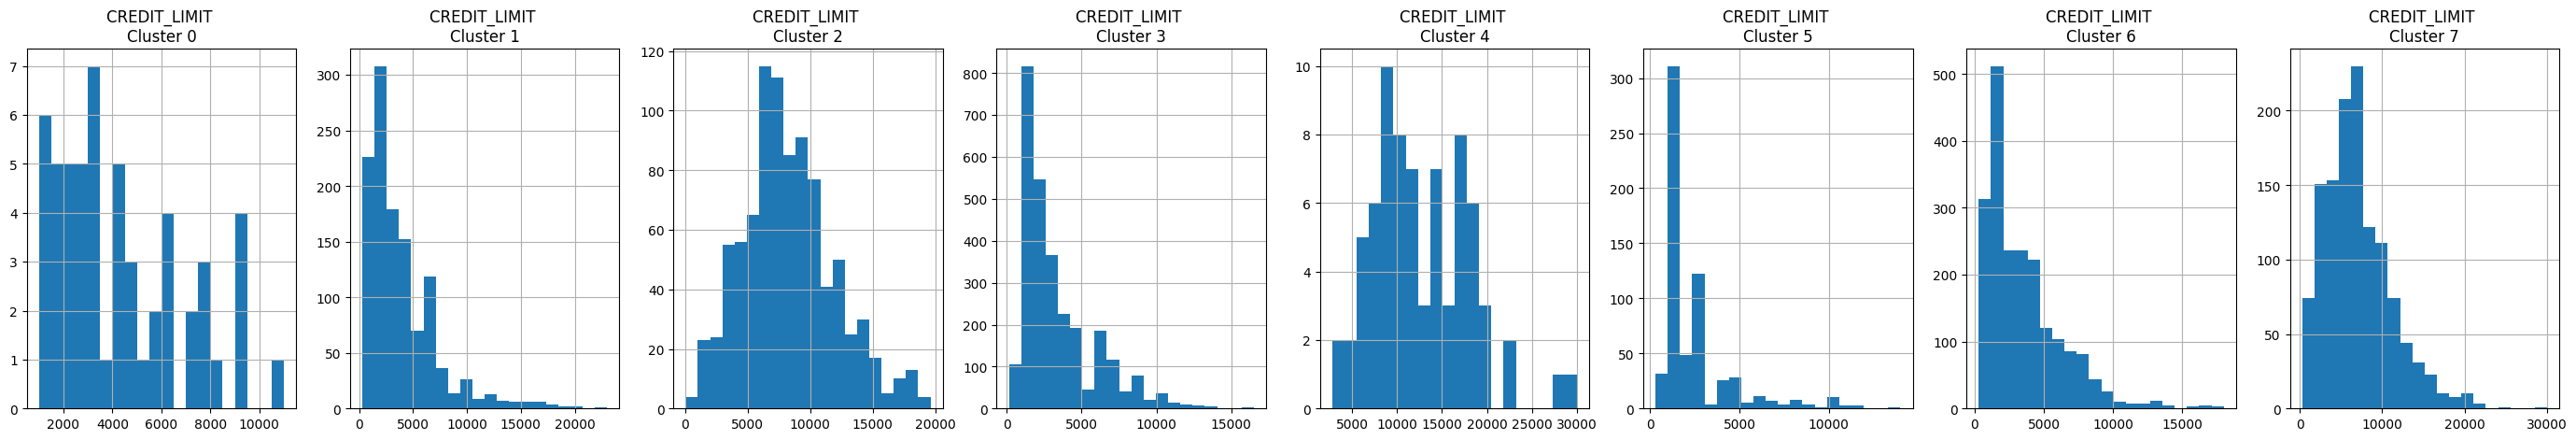

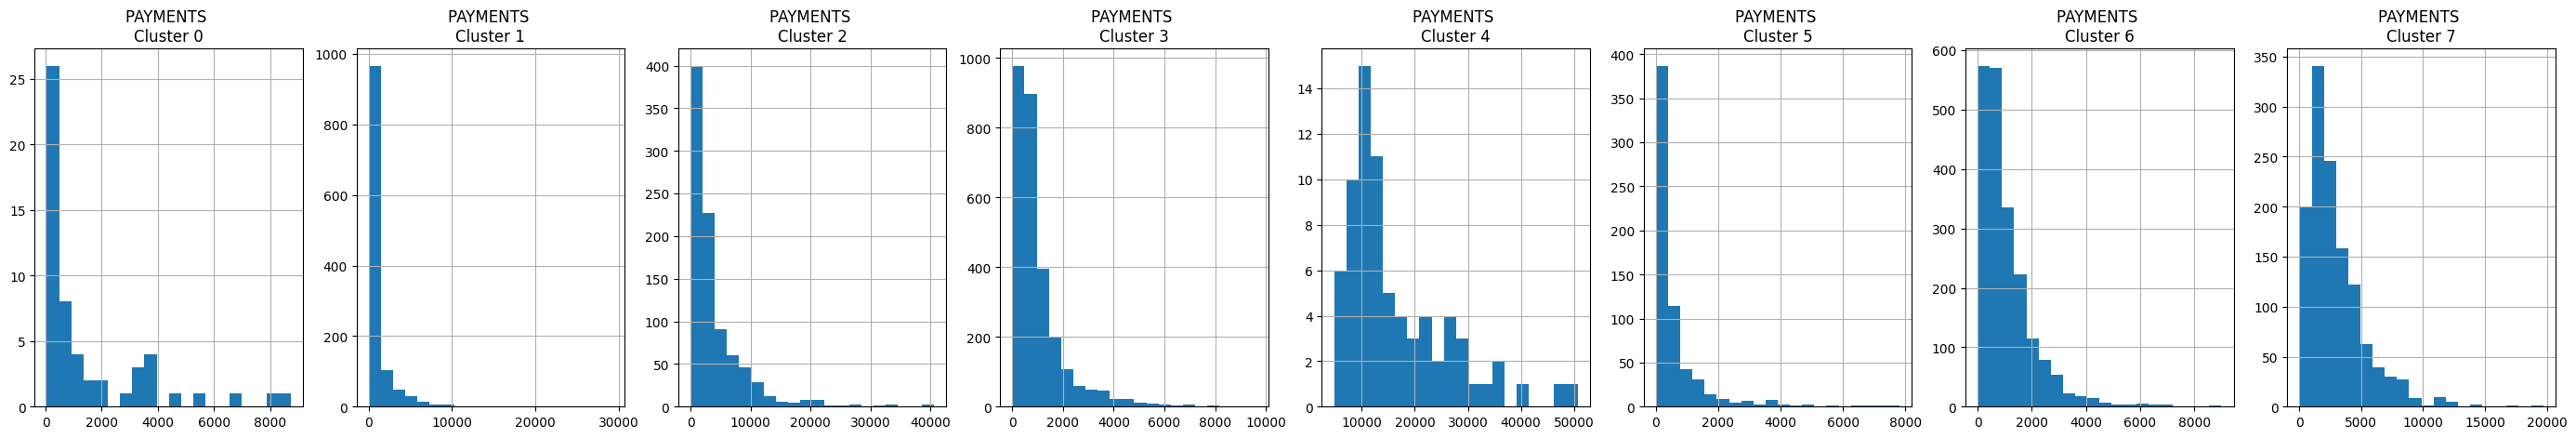

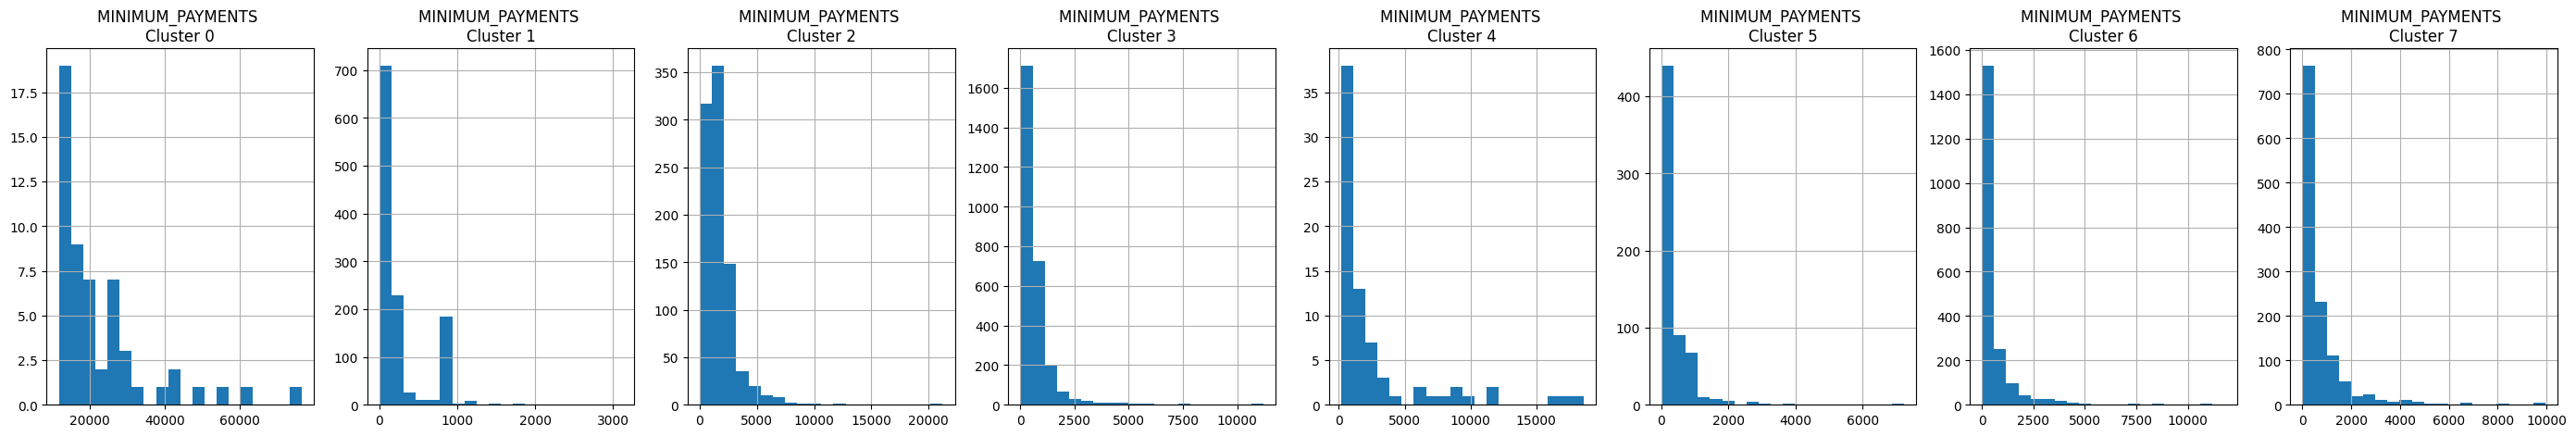

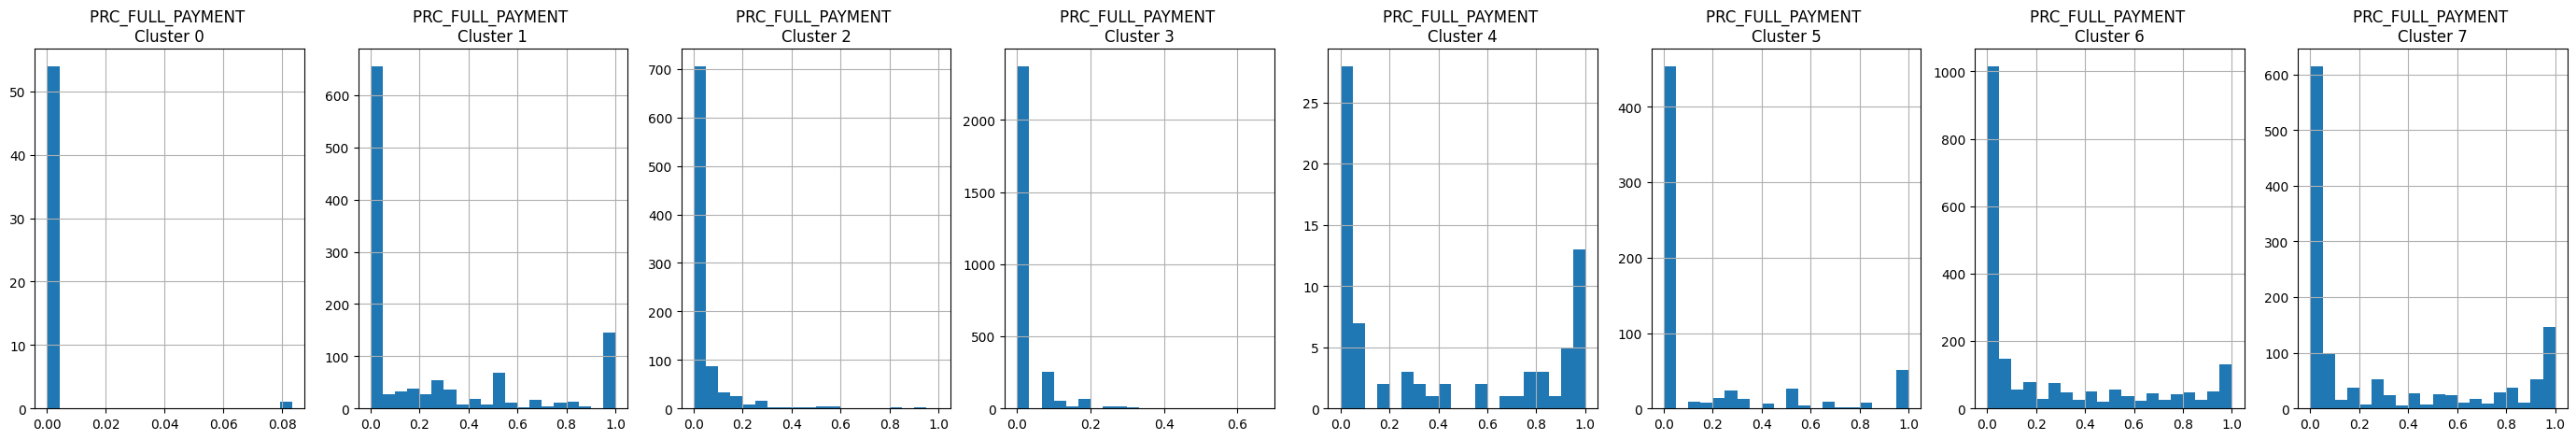

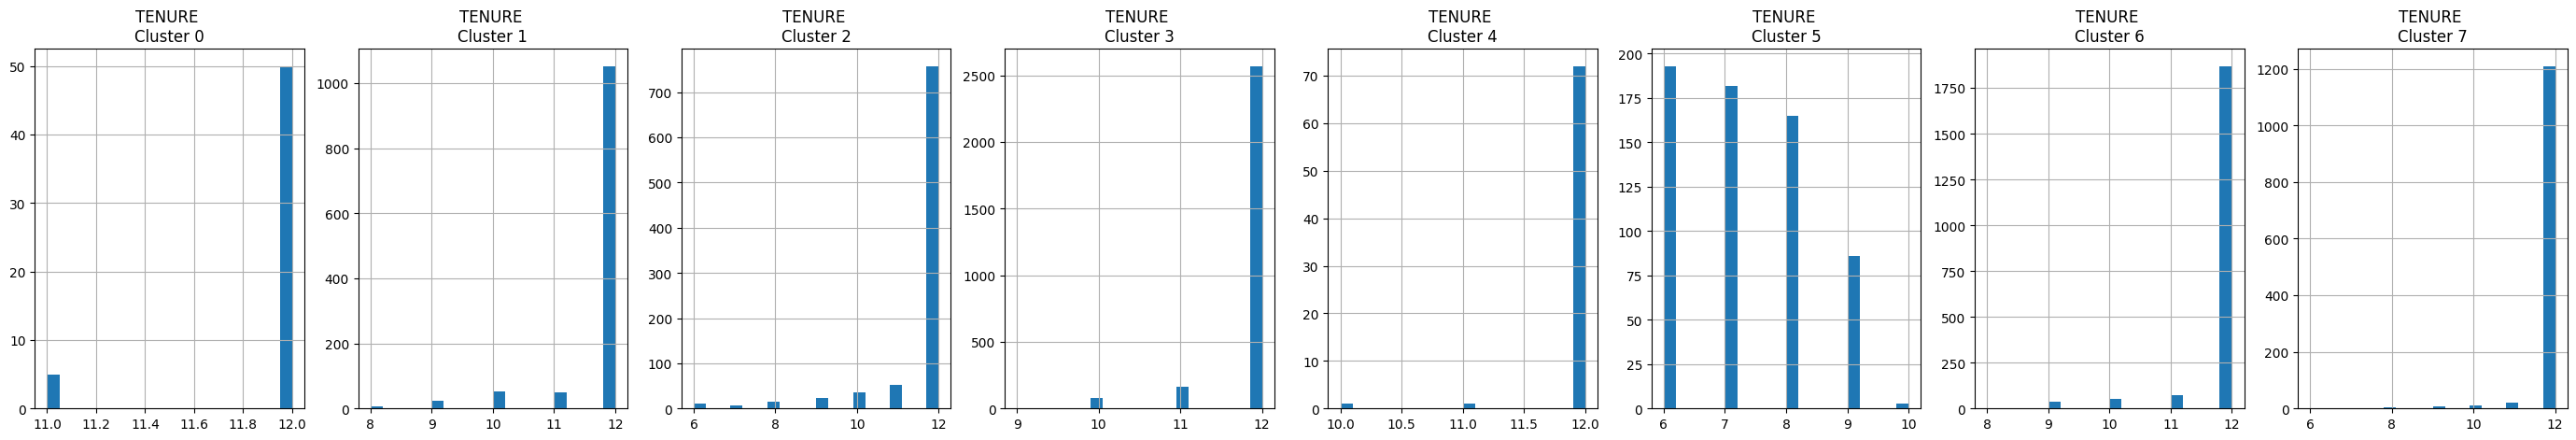

In [48]:
# Gerando histogramas utilizando o atributo de clusters

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [49]:
# Criando dataframe ordenado para enviar ao dpto de marketing

credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8026,5134.553859,1.0,2502.34,669.00,1833.34,0.000000,0.833333,0.083333,0.833333,0.000000,0,67,6000.0,528.134435,25312.16069,0.0,12,0
6635,4972.108843,1.0,2072.57,45.65,2026.92,0.000000,1.000000,0.083333,1.000000,0.000000,0,37,4500.0,1497.318035,29019.80288,0.0,12,0
5657,4628.109931,1.0,912.54,0.00,912.54,0.000000,1.000000,0.000000,1.000000,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12,0
7879,1381.080028,1.0,360.00,0.00,360.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,115.649241,13564.39121,0.0,12,0
8051,1601.393425,1.0,190.00,190.00,0.00,18.638559,0.250000,0.250000,0.000000,0.083333,1,6,1500.0,182.637387,12496.86093,0.0,12,0


In [50]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6131,41.011184,1.0,1314.75,125.19,1189.56,0.000000,1.000000,0.500000,1.000000,0.000000,0,70,6000.0,1303.104693,135.761304,0.70,12,7
597,5935.917803,1.0,1956.06,1777.14,178.92,0.000000,0.916667,0.916667,0.333333,0.000000,0,48,11500.0,1553.147417,1338.082337,0.00,12,7
598,266.588825,1.0,1750.51,1515.46,235.05,239.188373,1.000000,1.000000,0.166667,0.166667,2,31,3500.0,2103.253278,193.898848,0.25,12,7
2743,229.295689,1.0,2099.89,2099.89,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,14,3000.0,2470.255953,176.361201,0.00,12,7
6629,16259.448570,1.0,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.00,12,7


In [ ]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [51]:
# Aplicação da técnica de PCA para reduzir a dimensionalidade dos registros
# de 18 para 2 atributos, facilitando a visualização do gráfico de dispersão
# dos grupos
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221977, -1.07645153],
       [-1.1382947 ,  2.50647618],
       [ 0.96968023, -0.38351305],
       ...,
       [-0.92620276, -1.81078719],
       [-2.33654975, -0.65796962],
       [-0.55642328, -0.40046504]])

In [52]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138295,2.506476
2,0.969680,-0.383513
3,-0.873627,0.043164
4,-1.599433,-0.688581


In [53]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,3
1,-1.138295,2.506476,2
2,0.969680,-0.383513,7
3,-0.873627,0.043164,3
4,-1.599433,-0.688581,3


<Axes: xlabel='pca1', ylabel='pca2'>

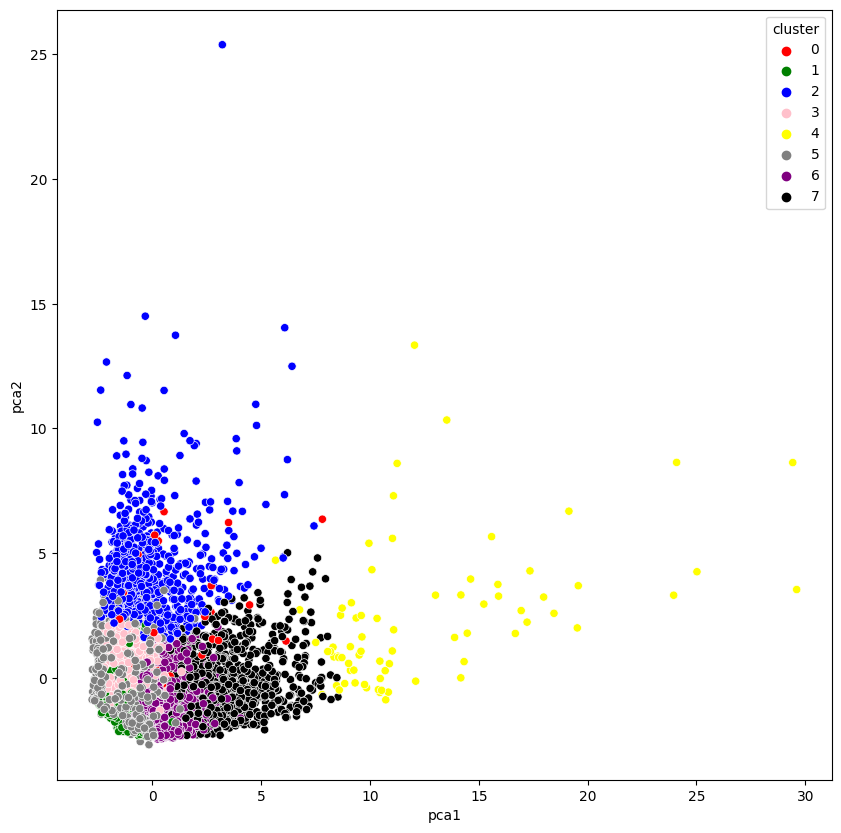

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

Analisando o gráfico acima não fiquei satisfeito com a dispersão dos grupos criados. Visualmente não estão bem definidos. Vou aplicar a técnica de autoencoders para redução de dimensionalidade com o objetivo de obter grupos mais bem definidos.

## Aplicação de autoencoders

In [55]:
# Aplicação da técnica de autoencoders para redução de dimensionalidade.
# Pode ser usada como alternativa à técnica de PCA ou usada de forma conjunta.

In [56]:
# Redução de 18 para 10 atributos
# Aplicar o Elbow
# Aplicar o K-means
# Aplicar o PCA

In [57]:
creditcard_df_scaled.shape

(8950, 17)

In [58]:
# Camadas de neurônios: 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [59]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [60]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [61]:
# encoder
encoder = Model(input_df, encoded)

In [62]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [63]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 24s 77ms/step - loss: 0.1770
Epoch 2/50
280/280 [==============================] - 20s 72ms/step - loss: 0.0653
Epoch 3/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0612
Epoch 4/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0466
Epoch 5/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0475
Epoch 6/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0366
Epoch 7/50
280/280 [==============================] - 12s 42ms/step - loss: 0.0295
Epoch 8/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0349
Epoch 9/50
280/280 [==============================] - 13s 46ms/step - loss: 0.0330
Epoch 10/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0439
Epoch 11/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0535
Epoch 12/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0258
E

In [64]:
creditcard_df_scaled.shape

(8950, 17)

In [65]:
# Criando base compact com 10 atributos (encoder)

compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 5ms/step


In [66]:
compact.shape

(8950, 10)

In [67]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [68]:
compact[0]

array([0.56624776, 0.        , 0.10918608, 0.        , 0.05440023,
       0.5658157 , 0.92876816, 0.6796929 , 1.1441718 , 0.        ],
      dtype=float32)

In [70]:
# Aplicação do Elbow method na base compact

wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

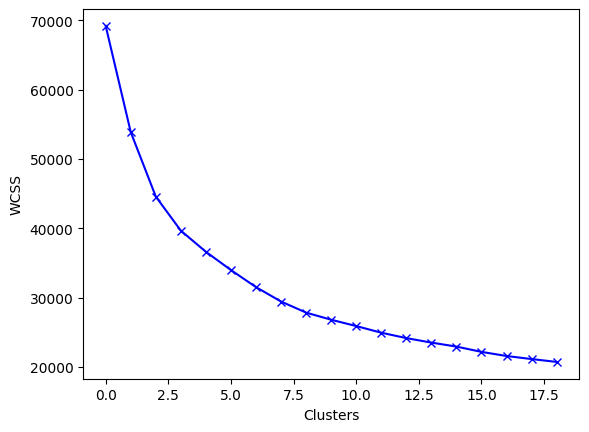

In [71]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

<ipython-input-72-9db8b4ff8091>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
<ipython-input-72-9db8b4ff8091>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


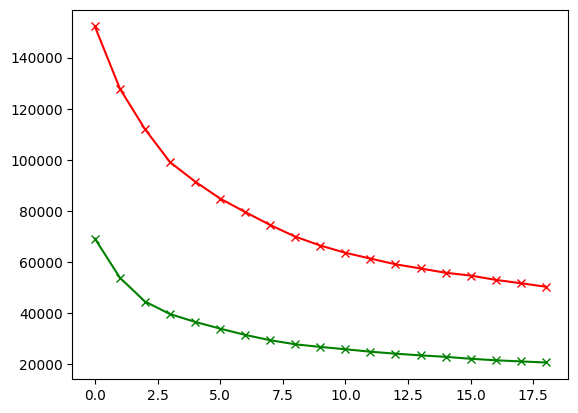

In [72]:
# Plotando os dois Elbows para comparação

plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

Com base no novo Elbow, decidi criar novo modelo com 4 clusters

In [75]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(compact)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [76]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 3, 0, ..., 3, 3, 3], dtype=int32), (8950,))

In [77]:
# Avaliando o modelo com o Silhouette Score e comparando com o modelo anterior

silhouette_avg = silhouette_score(creditcard_df_scaled, labels)
silhouette_avg_2 = silhouette_score(compact, labels)
print("Silhouette Score Modelo com 8 Clusters:", silhouette_avg)
print("Silhouette Score Modelo com 4 Clusters:", silhouette_avg_2)

Silhouette Score Modelo com 8 Clusters: 0.15836529532363255
Silhouette Score Modelo com 4 Clusters: 0.33995607


In [79]:
# Agora que temos os clusters criados a partir da base compact
# Vamos concatenar os clusters com cada cliente

df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [80]:
# Aplicação do PCA na base compact para visualização dos grupos
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.113656,-0.355961
1,0.597081,-0.333930
2,0.019813,0.297566
3,-0.088274,-0.288620
4,-1.246131,-0.002617


In [81]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.113656,-0.355961,0
1,0.597081,-0.333930,3
2,0.019813,0.297566,0
3,-0.088274,-0.288620,0
4,-1.246131,-0.002617,0


<Axes: xlabel='pca1', ylabel='pca2'>

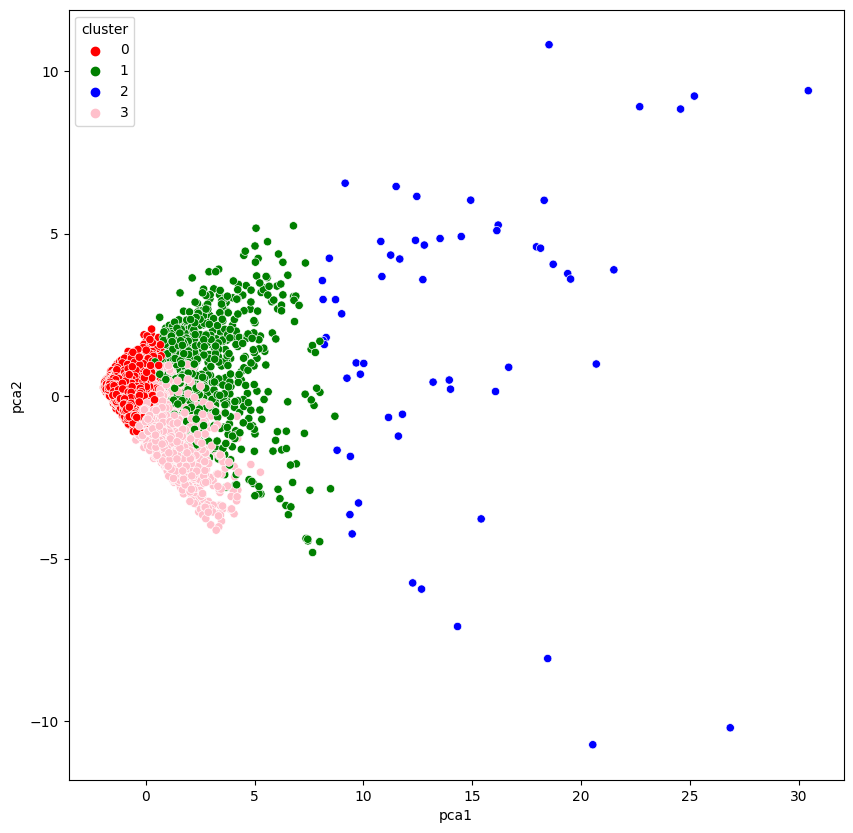

In [82]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

Podemos concluir, pela visualização do último gráfico e pelo score de silhueta, que com a aplicação da técnica de autoencoders obtivemos grupos mais bem definidos.

In [83]:
# Criando dataFrame para envio dos grupos para o departamento de marketing.

df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
5343,985.457755,1.000000,672.31,103.0,569.31,0.000000,1.000000,0.166667,1.000000,0.000000,0,17,2500.0,1656.974517,542.146630,0.000000,12,0
5342,1478.552756,1.000000,479.10,311.1,168.00,901.677781,0.500000,0.416667,0.500000,0.083333,1,11,4500.0,4774.597215,478.802097,0.000000,12,0
5341,7091.028361,1.000000,0.00,0.0,0.00,2137.809373,0.000000,0.000000,0.000000,0.250000,5,0,8500.0,1835.361842,2701.584337,0.000000,12,0
5337,18.606861,0.636364,302.50,0.0,302.50,0.000000,0.750000,0.000000,0.666667,0.000000,0,17,3000.0,705.810920,112.041868,0.333333,12,0


In [84]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1530,6.576315,0.272727,74.49,0.00,74.49,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,4000.0,45.195610,42.397448,0.166667,12,3
6514,0.187069,0.090909,522.00,290.00,232.00,0.000000,0.666667,0.083333,0.666667,0.000000,0,9,2900.0,760.989921,864.206542,0.000000,12,3
6515,2.752576,0.181818,30.90,0.00,30.90,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,3000.0,174.049821,114.010269,0.333333,12,3
6311,4.588899,0.272727,249.96,0.00,249.96,0.000000,0.916667,0.000000,0.916667,0.000000,0,17,4000.0,248.437485,36.714951,0.100000,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,3


In [86]:
df_cluster_ordered.to_excel('cluster_ordereded.xlsx')